In [2]:
! pip install -q pyomo
from pyomo.environ import *
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.9 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

$$\begin{equation}
minimize_{\{x_1,x_2,x_3,x_4,x_5, y\}} 0.043x_1 + 0.027x_2 + 0.025x_3 + 0.022x_4 + 0.045x_5 −0.275y  \\
\text{subject to} \\
\hspace{5em} C_1: x_1 + 3x_2 + x_3 + 7x_4 + x_5 -y \leq 100 \\
\hspace{6em} C_2: x_2 + 2x_3 + 4x_4 \geq 60 \\
\hspace{6em} C_3: -4x_1+24x_2-9x_3+19x_4+11x_5 \leq 0\\
\hspace{6em} C_4: -x_1+12x_2+x_3+3x_4 - 5x_5 \leq 0\\
\hspace{6em} C_5:x_1 - x_2 + x_3 - x_4 + x_5\geq 0\\
\hspace{6em} C_6:x_1 + x_2 + x_3 - x_5\geq 0\\
\hspace{5em} x_1, x_2, x_3,x_4,x_5 \geq 0 \\
\hspace{5em} 0\leq y \leq 2.5 \\
\end{equation}
$$

In [60]:
# CASE1
model1 = ConcreteModel()

model1.x1 = Var(domain = NonNegativeReals)
model1.x2 = Var(domain = NonNegativeReals)
model1.x3 = Var(domain = NonNegativeReals)
model1.x4 = Var(domain = NonNegativeReals)
model1.x5 = Var(domain = NonNegativeReals)
model1.y = Var(domain = NonNegativeReals)

# declaring constraints

model1.constr1 = Constraint(expr = model1.y <= 2.5)
model1.constr2 = Constraint(expr = model1.x1 +3*model1.x2 + 1*model1.x3 + 7*model1.x4 + 1*model1.x5 + -1*model1.y <= 100)
model1.constr3 = Constraint(expr = 1*model1.x2 + 2*model1.x3 + 4*model1.x4 >= 60)
model1.constr4 = Constraint(expr = -4*model1.x1 + 24*model1.x2 + -9*model1.x3 + 19*model1.x4 +11*model1.x5 <= 0)
model1.constr5 = Constraint(expr = -1*model1.x1 + 12*model1.x2 + 1*model1.x3 + 3*model1.x4 + -5*model1.x5 <= 0)
model1.constr6 = Constraint(expr = 1*model1.x1 + 1*model1.x2 + 1*model1.x3 + 0*model1.x4 + -1*model1.x5 >= 0)
model1.constr7 = Constraint(expr = 1*model1.x1 + -1*model1.x2 + 1*model1.x3 + -1*model1.x4 +11*model1.x5 >= 0)

# declaring objective function for optimization problem

model1.cost = Objective(expr = 0.043*model1.x1 + 0.027*model1.x2 + 0.025*model1.x3+ 0.022*model1.x4 + 0.045*model1.x5 + -0.0275*model1.y, sense=minimize)

In [61]:
model1.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objecti

In [62]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model1).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.852372448979592
  Upper bound: 0.852372448979592
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004773139953613281
# ----------------------------------------------------------
#   Solution Information
# -----------

In [63]:
print('\nCost = ', model1.cost())
print('\nDecision Variables')
print('x1 = ', model1.x1())
print('x2 = ', model1.x2())
print('x3 = ', model1.x3())
print('x4 = ', model1.x4())
print('x5 = ', model1.x5())
print('y = ', model1.y())


print('\nConstraints')
print('Constraint 1 = ', model1.constr1())
print('Constraint 2 = ', model1.constr2())
print('Constraint 3 = ', model1.constr3())
print('Constraint 4 = ', model1.constr4())
print('Constraint 5 = ', model1.constr5())
print('Constraint 6 = ', model1.constr6())
print('Constraint 7 = ', model1.constr7())


Cost =  0.8523724489795922

Decision Variables
x1 =  0.0
x2 =  0.0
x3 =  19.5918367346939
x4 =  5.20408163265306
x5 =  7.04081632653061
y =  2.5

Constraints
Constraint 1 =  2.5
Constraint 2 =  60.56122448979593
Constraint 3 =  60.00000000000004
Constraint 4 =  -2.4158453015843406e-13
Constraint 5 =  2.842170943040401e-14
Constraint 6 =  12.55102040816329
Constraint 7 =  91.83673469387756


In [70]:
# CASE2
model2 = ConcreteModel()

model2.x1 = Var(domain = NonNegativeReals)
model2.x2 = Var(domain = NonNegativeReals)
model2.x3 = Var(domain = NonNegativeReals)
model2.x4 = Var(domain = NonNegativeReals)
model2.x5 = Var(domain = NonNegativeReals)
model2.y = Var(domain = NonNegativeReals)

# declaring constraints

model2.constr1 = Constraint(expr = model2.x1 + 3*model2.x2 + model2.x3 + 7*model2.x4 + model2.x5 - model2.y <=100 )
model2.constr2 = Constraint(expr = model2.x2 + 2*model2.x3 + 4*model2.x4 >=60   )
model2.constr3 = Constraint(expr = -4*model2.x1 + 24*model2.x2 - 9*model2.x3 + 19*model2.x4 + 11*model2.x5 >= 0 )
model2.constr4 = Constraint(expr = -model2.x1 + 12*model2.x2 + model2.x3 + 3*model2.x4 - 5*model2.x5 <=0)
model2.constr5 = Constraint(expr = model2.x1 - model2.x2 + model2.x3 - model2.x4 + model2.x5 <= 0  )
model2.constr6 = Constraint(expr = model2.x1 + model2.x2 + model2.x3 - model2.x5 >= 0 )
model2.constr7 = Constraint(expr = model2.y <= 2.5)

# declaring objective function for optimization problem
model2.cost = Objective(expr = 0.043*model2.x1 + 0.027*model2.x2 + 0.025*model2.x3+ 0.022*model2.x4 + 0.045*model2.x5 + -0.0275*model2.y, sense=minimize )

In [71]:
model2.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objecti

In [72]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model2).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005567073822021484


In [64]:
# CASE3

model3 = ConcreteModel()

model3.x1 = Var(domain = NonNegativeReals)
model3.x2 = Var(domain = NonNegativeReals)
model3.x3 = Var(domain = NonNegativeReals)
model3.x4 = Var(domain = NonNegativeReals)
model3.x5 = Var(domain = NonNegativeReals)
model3.y = Var(domain = NonNegativeReals)

# declaring constraints

model3.constr1 = Constraint(expr = model3.x1 + 3*model3.x2 + model3.x3 + 7*model3.x4 + model3.x5 - model3.y <=100 )
model3.constr2 = Constraint(expr = model3.x2 + 2*model3.x3 + 4*model3.x4 >=60   )
model3.constr3 = Constraint(expr = -4*model3.x1 + 24*model3.x2 - 9*model3.x3 + 19*model3.x4 + 11*model3.x5 >= 0 )
model3.constr4 = Constraint(expr = -model3.x1 + 12*model3.x2 + model3.x3 + 3*model3.x4 - 5*model3.x5 >=0)
model3.constr5 = Constraint(expr = model3.x1 - model3.x2 + model3.x3 - model3.x4 + model3.x5 <= 0  )
model3.constr6 = Constraint(expr = model3.x1 + model3.x2 + model3.x3 - model3.x5 <= 0 )
model3.constr7 = Constraint(expr = model3.y <= 2.5)

# declaring objective function for optimization problem
model3.cost = Objective(expr = 0.043*model3.x1 + 0.027*model3.x2 + 0.025*model3.x3+ 0.022*model3.x4 + 0.045*model3.x5 + -0.0275*model3.y, sense=minimize)

In [65]:
model3.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objecti

In [66]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model3).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.359583333333333
  Upper bound: 0.359583333333333
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004338502883911133
# ----------------------------------------------------------
#   Solution Information
# -----------

In [67]:
print('\nCost = ', model3.cost())
print('\nDecision Variables')
print('x1 = ', model3.x1())
print('x2 = ', model3.x2())
print('x3 = ', model3.x3())
print('x4 = ', model3.x4())
print('x5 = ', model3.x5())
print('y = ', model3.y())


print('\nConstraints')
print('Constraint 1 = ', model3.constr1())
print('Constraint 2 = ', model3.constr2())
print('Constraint 3 = ', model3.constr3())
print('Constraint 4 = ', model3.constr4())
print('Constraint 5 = ', model3.constr5())
print('Constraint 6 = ', model3.constr6())
print('Constraint 7 = ', model3.constr7())


Cost =  0.3595833333333336

Decision Variables
x1 =  0.0
x2 =  0.0
x3 =  1.66666666666666
x4 =  14.1666666666667
x5 =  1.66666666666666
y =  2.5

Constraints
Constraint 1 =  100.00000000000021
Constraint 2 =  60.00000000000012
Constraint 3 =  272.5000000000006
Constraint 4 =  35.83333333333346
Constraint 5 =  -10.833333333333378
Constraint 6 =  0.0
Constraint 7 =  2.5


In [68]:
# CASE4

model4 = ConcreteModel()

model4.x1 = Var(domain = NonNegativeReals)
model4.x2 = Var(domain = NonNegativeReals)
model4.x3 = Var(domain = NonNegativeReals)
model4.x4 = Var(domain = NonNegativeReals)
model4.x5 = Var(domain = NonNegativeReals)
model4.y = Var(domain = NonNegativeReals)

# declaring constraints

model4.constr1 = Constraint(expr = model4.x1 + 3*model4.x2 + model4.x3 + 7*model4.x4 + model4.x5 - model4.y <=100 )
model4.constr2 = Constraint(expr = model4.x2 + 2*model4.x3 + 4*model4.x4 >=60   )
model4.constr3 = Constraint(expr = -4*model4.x1 + 24*model4.x2 - 9*model4.x3 + 19*model4.x4 + 11*model4.x5 <= 0 )
model4.constr4 = Constraint(expr = -model4.x1 + 12*model4.x2 + model4.x3 + 3*model4.x4 - 5*model4.x5 >=0)
model4.constr5 = Constraint(expr = model4.x1 - model4.x2 + model4.x3 - model4.x4 + model4.x5 >= 0  )
model4.constr6 = Constraint(expr = model4.x1 + model4.x2 + model4.x3 - model4.x5 <= 0 )
model4.constr7 = Constraint(expr = model4.y <= 2.5)

# declaring objective function for optimization problem
model4.cost = Objective(expr = 0.043*model4.x1 + 0.027*model4.x2 + 0.025*model4.x3+ 0.022*model4.x4 + 0.045*model4.x5 + -0.0275*model4.y, sense=minimize )

In [69]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model4).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0050487518310546875


In [16]:
#OPTIMAL MIZ: CENTRALIZED

model5 = ConcreteModel()

model5.x1 = Var(domain = NonNegativeReals)
model5.x2 = Var(domain = NonNegativeReals)
model5.y1 = Var(domain = NonNegativeReals)
model5.y2 = Var(domain = NonNegativeReals)



# declaring constraints

model5.constr1 = Constraint(expr = 4*model5.x1 + 2*model5.x2 <=80 )
model5.constr2 = Constraint(expr = 2*model5.x1 + 5*model5.x2 <= 60 )
model5.constr3 = Constraint(expr = 5*model5.y1 + 3*model5.y2 <= 60)
model5.constr4 = Constraint(expr =  5*model5.y1 + 6*model5.y2 <= 75)
model5.constr5 = Constraint(expr = model5.x1 + model5.x2 <=60 )
model5.constr6 = Constraint(expr = model5.y1 + model5.y2 <=60 )

# declaring objective function for optimization problem

model5.cost = Objective(expr =10*(model5.x1 +model5.y1) + 15*(model5.x2 +model5.y2) , sense = maximize)

In [17]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model5).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.009455204010009766
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [18]:
print('\nCost = ', model5.cost())
print('\nDecision Variables')
print('x1 = ', model5.x1())
print('x2 = ', model5.x2())
print('y1 = ', model5.y1())
print('y2 = ', model5.y2())



print('\nConstraints')
print('Constraint 1 = ', model5.constr1())
print('Constraint 2 = ', model5.constr2())
print('Constraint 3 = ', model5.constr3())
print('Constraint 4 = ', model5.constr4())
print('Constraint 5 = ', model5.constr5())
print('Constraint 6 = ', model5.constr6())


Cost =  437.5

Decision Variables
x1 =  17.5
x2 =  5.0
y1 =  0.0
y2 =  12.5

Constraints
Constraint 1 =  80.0
Constraint 2 =  60.0
Constraint 3 =  37.5
Constraint 4 =  75.0
Constraint 5 =  22.5
Constraint 6 =  12.5


In [19]:
#DECENTRALIZED

model6 = ConcreteModel()

model6.x1 = Var(domain = NonNegativeReals)
model6.x2 = Var(domain = NonNegativeReals)
model6.y1 = Var(domain = NonNegativeReals)
model6.y2 = Var(domain = NonNegativeReals)



# declaring constraints

model6.constr1 = Constraint(expr = 4*model6.x1 + 2*model6.x2 <=80 )
model6.constr2 = Constraint(expr = 2*model6.x1 + 5*model6.x2 <= 60 )
model6.constr3 = Constraint(expr = 5*model6.y1 + 3*model6.y2 <= 60)
model6.constr4 = Constraint(expr =  5*model6.y1 + 6*model6.y2 <= 75)
model6.constr5 = Constraint(expr = model6.x1 + model6.x2 + model6.y1 + model6.y2 <= 120 )


# declaring objective function for optimization problem

model6.cost = Objective(expr =10*(model6.x1 +model6.y1) + 15*(model6.x2 +model6.y2) , sense = maximize)

In [20]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model6).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.011268138885498047
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [21]:
print('\nCost = ', model6.cost())
print('\nDecision Variables')
print('x1 = ', model6.x1())
print('x2 = ', model6.x2())
print('y1 = ', model6.y1())
print('y2 = ', model6.y2())



print('\nConstraints')
print('Constraint 1 = ', model6.constr1())
print('Constraint 2 = ', model6.constr2())
print('Constraint 3 = ', model6.constr3())
print('Constraint 4 = ', model6.constr4())
print('Constraint 5 = ', model6.constr5())



Cost =  437.5

Decision Variables
x1 =  17.5
x2 =  5.0
y1 =  0.0
y2 =  12.5

Constraints
Constraint 1 =  80.0
Constraint 2 =  60.0
Constraint 3 =  37.5
Constraint 4 =  75.0
Constraint 5 =  35.0


In [47]:

import numpy as np
import matplotlib.pyplot as plt

In [43]:
costs = []

for i in range(100):
  r = np.linspace(0,1,100)
  model7 = ConcreteModel()

  model7.x1 = Var(domain = NonNegativeReals)
  model7.x2 = Var(domain = NonNegativeReals)
  model7.y1 = Var(domain = NonNegativeReals)
  model7.y2 = Var(domain = NonNegativeReals)



  # declaring constraints

  model7.constr1 = Constraint(expr = 4*model7.x1 + 2*model7.x2 <=80 )
  model7.constr2 = Constraint(expr = 2*model7.x1 + 5*model7.x2 <= 60 )
  model7.constr3 = Constraint(expr = 5*model7.y1 + 3*model7.y2 <= 60)
  model7.constr4 = Constraint(expr =  5*model7.y1 + 6*model7.y2 <= 75)
  model7.constr5 = Constraint(expr = model7.x1 + model7.x2 <= r[i]*120 )

  model7.constr6 = Constraint(expr = model7.y1 + model7.y2<= (1- r[i])*120)


  model7.cost = Objective(expr =10*(model7.x1 +model7.y1) + 15*(model7.x2 +model7.y2) , sense = maximize)

  SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model7).write()


  costs.append(model7.cost())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 187.5
  Upper bound: 187.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0053484439849853516
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

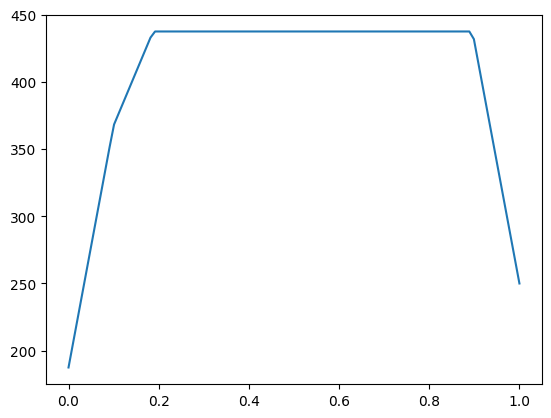

In [46]:
plt.plot(r,costs)
plt.show()




In [73]:
#DUAL PROBLEM

model8=ConcreteModel() # creating the dual for refinary D
model8.x1 = Var(domain = NonNegativeReals)
model8.x2 = Var(domain = NonNegativeReals)
model8.x3 = Var(domain = NonNegativeReals)
model8.constr1=Constraint(expr = 1*model8.x1 +4*model8.x2 + 2*model8.x3 >= 10)
model8.constr2=Constraint(expr = 1*model8.x1 +2*model8.x2  + 5*model8.x3 >= 15)

model8.cost = Objective(expr = 60*model8.x1 + 80*model8.x2 + 60*model8.x3 ,sense=minimize)
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model8).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 250.0
  Upper bound: 250.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 3
  Number of nonzeros: 6
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.00423431396484375
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

In [74]:
print('\nCost = ', model8.cost())
print('\nDecision Variables')
print('x1 = ', model8.x1())
print('x2 = ', model8.x2())
print('x3 = ', model8.x3())




print('\nConstraints')
print('Constraint 1 = ', model8.constr1())
print('Constraint 2 = ', model8.constr2())



Cost =  250.0

Decision Variables
x1 =  0.0
x2 =  1.25
x3 =  2.5

Constraints
Constraint 1 =  10.0
Constraint 2 =  15.0
